In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
sn.set_context('notebook')

Assume true relatrionship:

$$Y = 5Q - 0.2P + 2C + 7 + \epsilon$$

In [2]:
# Generate "fake" data for explanatory vars
q = np.random.uniform(low=0.1, high=100, size=100) # Our data 0.1 to 102
p = np.random.uniform(low=1, high=400, size=100)   # Our data 1 to 439
c = np.random.uniform(low=0.5, high=10, size=100)  # Our data 0.5 to 9.4
err = np.random.normal(loc=0, scale=10, size=100)

# Response
y = 5*q -0.2*p + 2*c + 7 + err

# Build df
df = pd.DataFrame({'y':y,
                   'q':q,
                   'p':p,
                   'c':c})

# "Normalise" Q i.e. divide mean flow by long-term mean, s.t. mean for
# all rivers is roughly 1
df['q_norm'] = df['q'] / (df['q']*np.random.uniform(low=0.9, high=1.1, size=100))

df.head()

,c,p,q,y,q_norm
0,3.970078,99.139502,3.568422,3.326975,0.958810
1,2.523644,98.412854,71.792964,347.476564,0.940740
2,5.075471,330.567066,7.813862,-6.833360,0.912723
3,8.709485,306.965538,55.589503,254.604845,0.972384
4,4.310985,222.177131,55.869281,263.713899,0.978180


In [3]:
# OLS regression using "raw" i.e. non-normalised data
mod_str = 'y ~ q + p + c'
model = smf.ols(mod_str, data=df).fit_regularized(alpha=0, l1_wt=0)

print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8795.
Date:                Thu, 26 Oct 2017   Prob (F-statistic):          5.53e-117
Time:                        17:49:28   Log-Likelihood:                -366.64
No. Observations:                 100   AIC:                             741.3
Df Residuals:                      96   BIC:                             751.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.3834      3.196      1.997      0.0

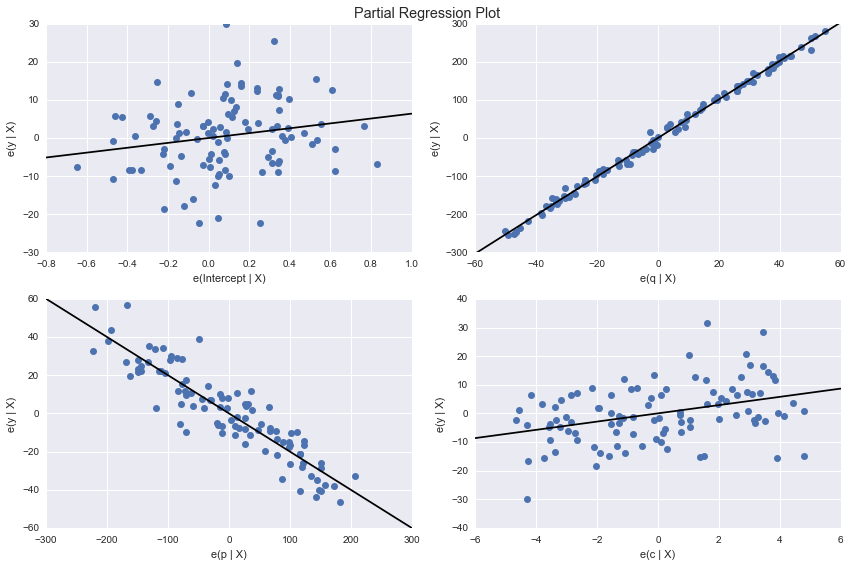

In [4]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

This results in a good model that correctly recovers the "true" parameter coefficients. In other words, we can accurately assess the relative effects of Q, P and T. For example, the influence of P *after allowing for Q and T* is -0.2 units change in y for every unit change in P.

In [5]:
# OLS regression using normalised data
mod_str = 'y ~ q_norm + p + c'
model = smf.ols(mod_str, data=df).fit_regularized(alpha=0, l1_wt=0)

print model.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     5.876
Date:                Thu, 26 Oct 2017   Prob (F-statistic):            0.00100
Time:                        17:49:29   Log-Likelihood:                -639.20
No. Observations:                 100   AIC:                             1286.
Df Residuals:                      96   BIC:                             1297.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    139.6997    256.553      0.545      0.5

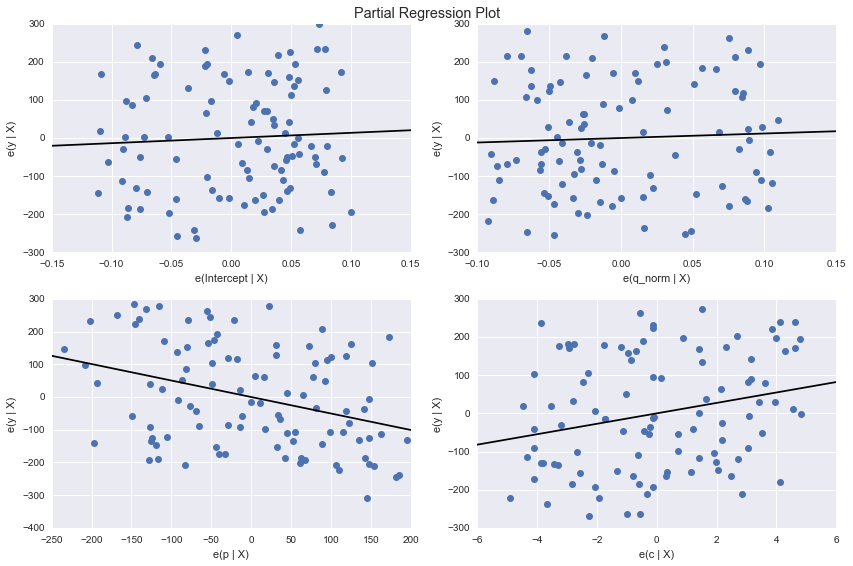

In [6]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

This model is *much* worse. The relationship is not significant (p-values, F-statistics and the BIC are all large), R2 is poor, and there are problems with the "condition number", indicating numerical instability. The model coefficients are also wildly inaccurate e.g. the relationship with Q is estimated as being large and negative, which is incorrect.